In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from itertools import accumulate
import cvxpy as cp

In [2]:
data = pd.read_csv("german_credit_data.csv", index_col=0)

In [3]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [4]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [5]:
data_y = pd.read_csv("german_credit.csv")

In [6]:
data_y.columns

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

In [7]:
data.Age.describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [8]:
data_dummies = pd.get_dummies(data["Sex"])
data_dummies[["free", "own", "rent"]] = pd.get_dummies(data["Housing"])
data_dummies[["little", "moderate", "quite rich", "rich"]] = pd.get_dummies(data["Saving accounts"])
data_dummies[["Age Bucket A", "Age Bucket B", "Age Bucket c", "Age Bucket D"]] = pd.get_dummies(pd.cut(data.Age, [18, 25, 45, 60, 75]))
data_dummies["Creditability"] = data_y["Creditability"]

In [9]:
exp = data_dummies.iloc[:, 1:]
exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   male           1000 non-null   uint8
 1   free           1000 non-null   uint8
 2   own            1000 non-null   uint8
 3   rent           1000 non-null   uint8
 4   little         1000 non-null   uint8
 5   moderate       1000 non-null   uint8
 6   quite rich     1000 non-null   uint8
 7   rich           1000 non-null   uint8
 8   Age Bucket A   1000 non-null   uint8
 9   Age Bucket B   1000 non-null   uint8
 10  Age Bucket c   1000 non-null   uint8
 11  Age Bucket D   1000 non-null   uint8
 12  Creditability  1000 non-null   int64
dtypes: int64(1), uint8(12)
memory usage: 27.3 KB


In [10]:
var = data_dummies.columns
VAR = var[:-1]
VAR

Index(['female', 'male', 'free', 'own', 'rent', 'little', 'moderate',
       'quite rich', 'rich', 'Age Bucket A', 'Age Bucket B', 'Age Bucket c',
       'Age Bucket D'],
      dtype='object')

In [37]:
logit = sm.GLM(data_dummies["Creditability"], data_dummies[VAR].to_numpy(), family=sm.families.Binomial())
results = logit.fit()

In [39]:
coef

x1     0.325224
x2     0.264426
x3     0.329175
x4     0.256619
x5     0.003856
x6     0.243305
x7     0.469528
x8     0.223045
x9     0.385162
x10    0.215479
x11    0.114976
x12   -0.014848
x13    0.274042
dtype: float64

In [38]:
coef = results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Creditability   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      989
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -607.73
Date:                Wed, 16 Nov 2022   Deviance:                       1215.5
Time:                        08:28:33   Pearson chi2:                 1.00e+03
No. Iterations:                   100   Pseudo R-squ. (CS):           0.006243
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3252      0.125      2.605      0.009       0.081       0.570
x2             0.2644      0.106      2.500      0.012       0.057       0.472
x3             0.3292      0.179      1.837      0.066      -0.022       0.680
x4             0.2566      0.105      2.434      0.015       0.050       0.463
x5             0.0039      0.151      0.026      0.980      -0.291       0.299
x6             0.2433      0.179      1.357      0.175      -0.108       0.595
x7             0.4695      0.274      1.711      0.087      -0.068       1.007
x8             0.2230      0.315      0.708      0.479      -0.395       0.841
x9             0.3852      0.361      1.068      0.286      -0.322       1.092
x10            0.2155      0.165      1.305      0.192      -0.108       0.539
x11            0.1150      0.117      0.983      0.326      -0.114       0.344
x12           -0.0148      0.168     -0.088      0.930      -0.345       0.315
x13            0.2740      0.281      0.976      0.329      -0.276       0.824
==============================================================================
"""

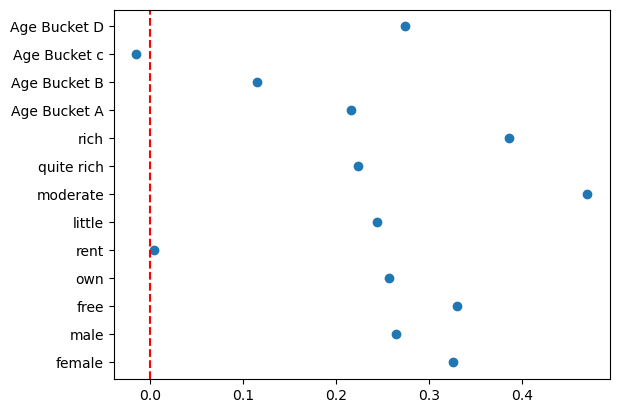

In [13]:
x = list(range(len(VAR)))
plt.scatter(coef, x)
plt.yticks(x, VAR)
plt.axvline(x=0, color="r", linestyle="--")
plt.show()

## Now we will like to produce a bias by sex and income

In [14]:
females = data_dummies[data_dummies.female == 1]
females_good = females[females.Creditability == 1]
females_bad = females[females.Creditability == 0]
males = data_dummies[data_dummies.female == 0]
fem_good_sample = females_good.sample(frac = 0.5)
fem_bad_sample = females_bad.sample(frac = 0.25)
sex_skewed_data = pd.concat([males, females_good, fem_bad_sample])


## Lest try build the weights

In [15]:
true_prop_good_fem = females_good.female.sum()
true_prop_bad_fem = females_bad.female.sum()
obs_prop_good_fem = sex_skewed_data[sex_skewed_data["Creditability"] == 1].female.sum()
obs_prop_bad_fem = sex_skewed_data[sex_skewed_data["Creditability"] == 0].female.sum()

print(true_prop_good_fem, true_prop_bad_fem, obs_prop_good_fem, obs_prop_bad_fem)

219 91 219 23


In [16]:
w = np.array([true_prop_good_fem/obs_prop_good_fem, 1])
w_h = np.array([true_prop_bad_fem/obs_prop_bad_fem, 1])
print(w, w_h)

[1. 1.] [3.95652174 1.        ]


In [24]:
def assign_weights(row):
    if row.Creditability == 1:
        if row.female == 1:
            return w[0]
        else:
            return w[1]
    if row.Creditability == 0:
        if row.female == 1:
            return w_h[0]
        else:
            return w_h[1]

In [25]:
sex_skewed_data["weights"] = sex_skewed_data.apply(assign_weights, axis=1)

In [26]:
logit = sm.GLM(sex_skewed_data["Creditability"], sex_skewed_data[VAR].to_numpy(), family=sm.families.Binomial(), var_weights=sex_skewed_data["weights"])
results = logit.fit()
coef_bias = results.params

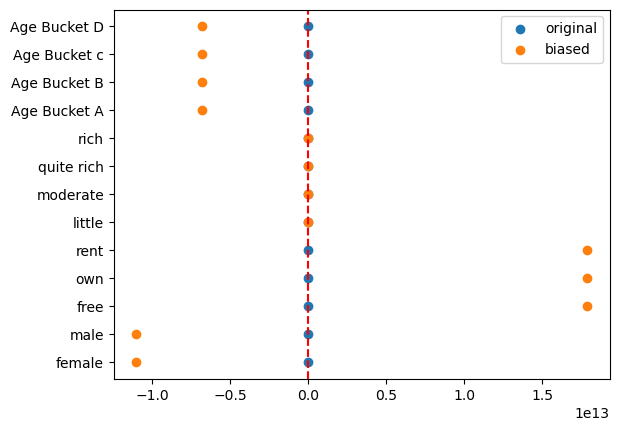

In [27]:
x = list(range(len(VAR)))
plt.scatter(coef, x)
plt.scatter(coef_bias, x)
plt.legend(["original", "biased"])
plt.yticks(x, VAR)
plt.axvline(x=0, color="r", linestyle="--")
plt.show()

# Lets fix quite rich , lest build everything as an optimization problem

Here we are working under the assumption that P(A|x,y) is kwon, hence we can try several combinations fir every binary variable and see if looping trough posible combinations the original coefficint can be the bias

In [28]:
true_prop_good_fem = females_good.female.sum()
true_prop_bad_fem = females_bad.female.sum()
obs_prop_good_fem = sex_skewed_data[sex_skewed_data["Creditability"] == 1].female.sum()
obs_prop_bad_fem = sex_skewed_data[sex_skewed_data["Creditability"] == 0].female.sum()

print(true_prop_good_fem, true_prop_bad_fem, obs_prop_good_fem, obs_prop_bad_fem)

219 91 219 23


In [29]:
w = np.array([obs_prop_good_fem/true_prop_good_fem, 1])
w_b = np.array([true_prop_bad_fem/obs_prop_bad_fem, 1])
print(w, w_h)

[1. 1.] [3.95652174 1.        ]


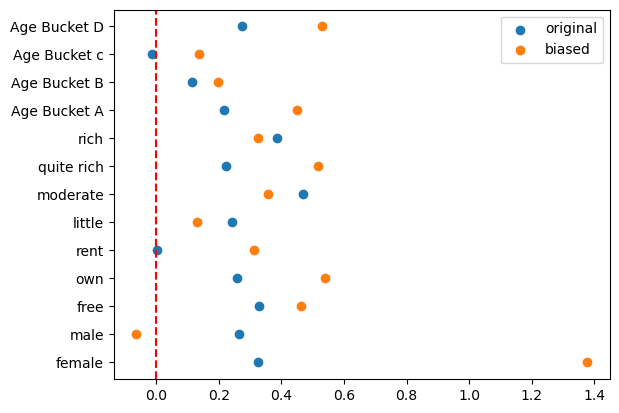

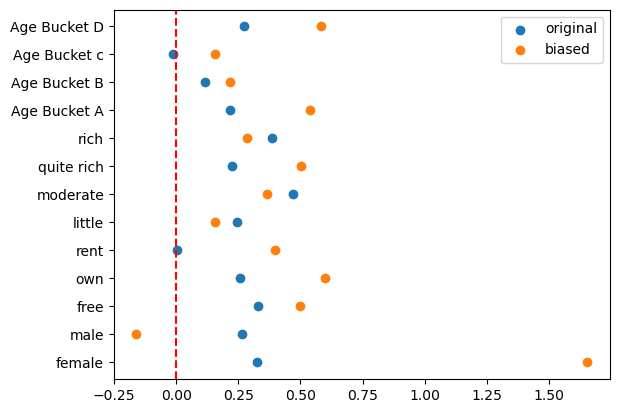

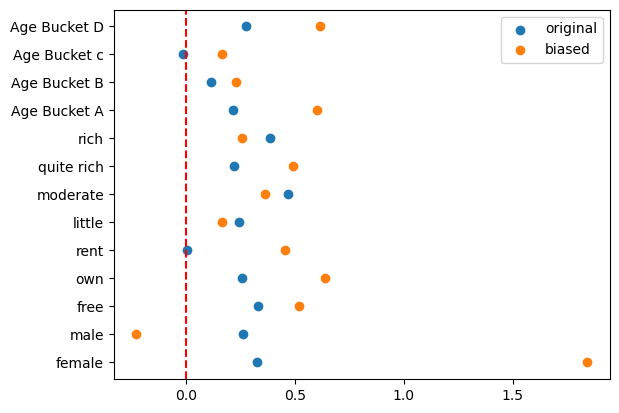

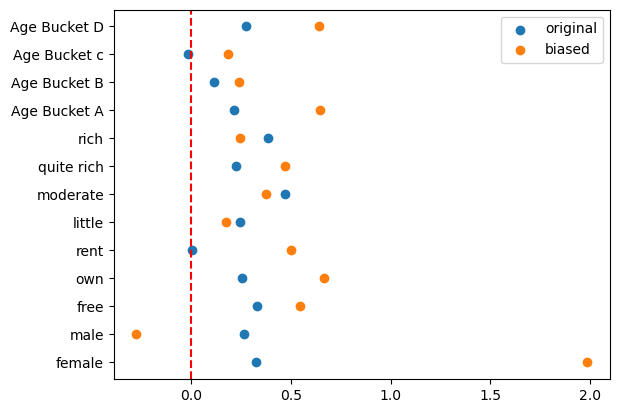

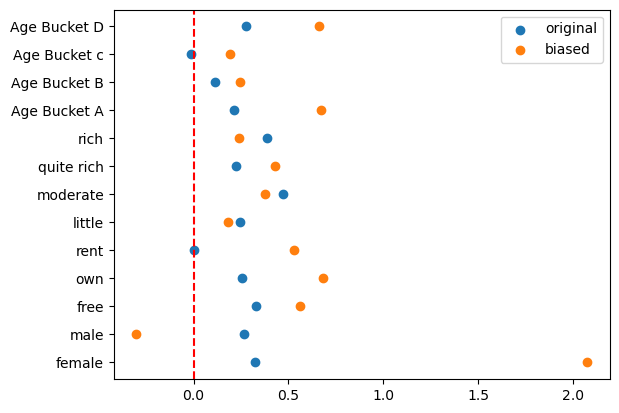

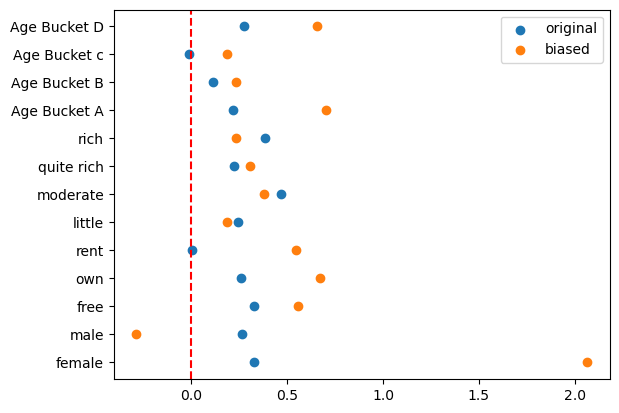

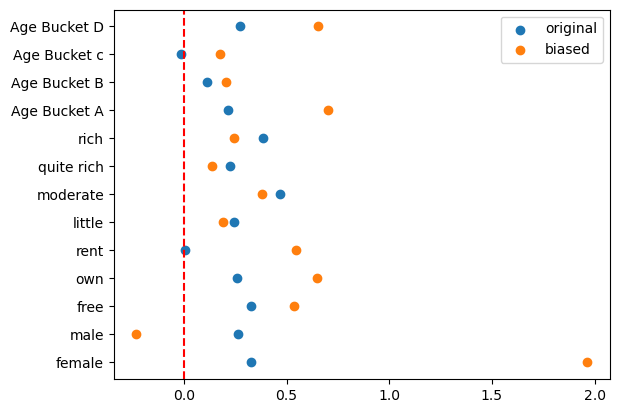

In [30]:
for x in [1, 1.5, 2, 2.5, 3, 3.5, 3.7]:
    def assign_weights(row):
        if row.Creditability == 0:
            if row.female == 1:
                if row["quite rich"] == 1:
                    return 1/(w_b[0] - x)
                else:
                    return 1/x
            else:
                return 1
        if row.Creditability ==1:
            if row.female == 1:
                return 1 
            else:
                return 1
    sex_skewed_data["weights"] = sex_skewed_data.apply(assign_weights, axis=1)
    logit = sm.GLM(sex_skewed_data["Creditability"], sex_skewed_data[VAR].to_numpy(), family=sm.families.Binomial(), var_weights=sex_skewed_data["weights"])
    results = logit.fit()
    coef_bias = results.params
    x = list(range(len(VAR)))
    plt.scatter(coef, x)
    plt.scatter(coef_bias, x)
    plt.legend(["original", "biased"])
    plt.yticks(x, VAR)
    plt.axvline(x=0, color="r", linestyle="--")
    plt.show()

# Lets fix quite rich, with two restrictions lest build everything as an optimization problem (Two biased groups)

Here we are working under the assumption that P(A|x,y) is kwon, hence we can try several combinations fir every binary variable and see if looping trough posible combinations the original coefficint can be the bias. Here we are trying to fix two coovariates instead of one. Lets sample good males as well, to keep consistency.

In [32]:
females = data_dummies[data_dummies.female == 1]
females_good = females[females.Creditability == 1]
females_bad = females[females.Creditability == 0]
males = data_dummies[data_dummies.female == 0]
males_good = males[males.Creditability == 1]
males_bad = males[males.Creditability == 0]
ma_good_sample = males_good.sample(frac = 0.25)
fem_bad_sample = females_bad.sample(frac = 0.25)
sex_skewed_data = pd.concat([ma_good_sample, males_bad, females_good, fem_bad_sample])

##  Compute the best weights from which there is some informationa avaliable:

1/p(A|X,Y) is the ebst posible weight, from it all the posible restrictions are going to be derived as $p(A|X,Y) = p(A|X,Y, Z=0) + p(A|X,Y, Z=1)$. 

In [33]:
true_prop_good_fem = females_good.female.sum()
true_prop_bad_fem = females_bad.female.sum()
obs_prop_good_fem = sex_skewed_data[sex_skewed_data["Creditability"] == 1].female.sum()
obs_prop_bad_fem = sex_skewed_data[sex_skewed_data["Creditability"] == 0].female.sum()

true_prop_good_m = males_good.male.sum()
true_prop_bad_m = males_bad.male.sum()
obs_prop_good_m = sex_skewed_data[sex_skewed_data["Creditability"] == 1].male.sum()
obs_prop_bad_m = sex_skewed_data[sex_skewed_data["Creditability"] == 0].male.sum()

print(true_prop_good_fem, true_prop_bad_fem, obs_prop_good_fem, obs_prop_bad_fem)
print(true_prop_good_m, true_prop_bad_m, obs_prop_good_m, obs_prop_bad_m)

219 91 219 23
481 209 120 209


In [34]:
w = np.array([obs_prop_good_fem/true_prop_good_fem, 1])
w_b = np.array([obs_prop_bad_fem/true_prop_bad_fem, 1])
print(w, w_b)
w_M = np.array([obs_prop_good_m/true_prop_good_m, 1])
w_Mb = np.array([obs_prop_bad_m/true_prop_bad_m, 1])
print(w_M, w_Mb)

[1. 1.] [0.25274725 1.        ]
[0.24948025 1.        ] [1. 1.]


In [35]:
search_space_x = [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25]
search_space_y = [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.24]

0.22304520605008724


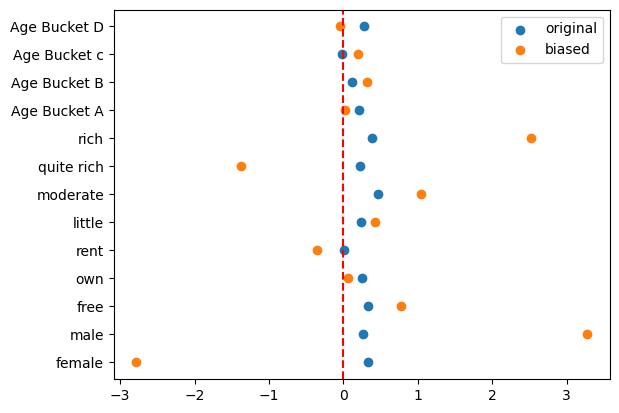

0.22304520605008724


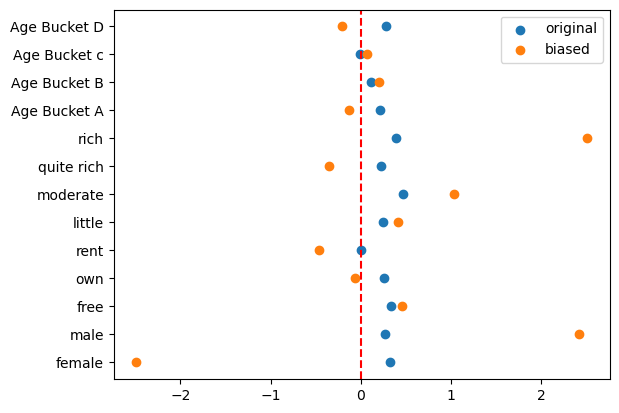

0.22304520605008724


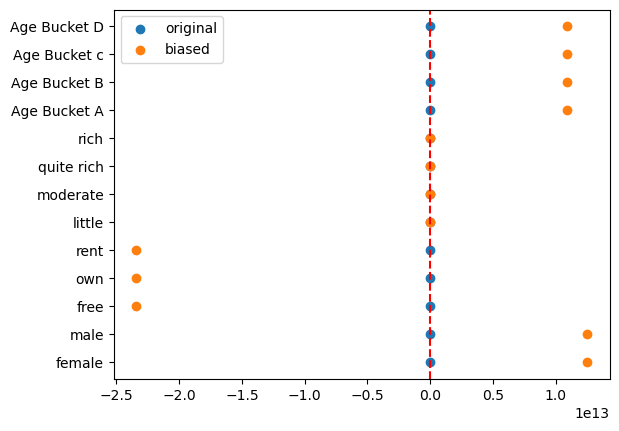

0.22304520605008724


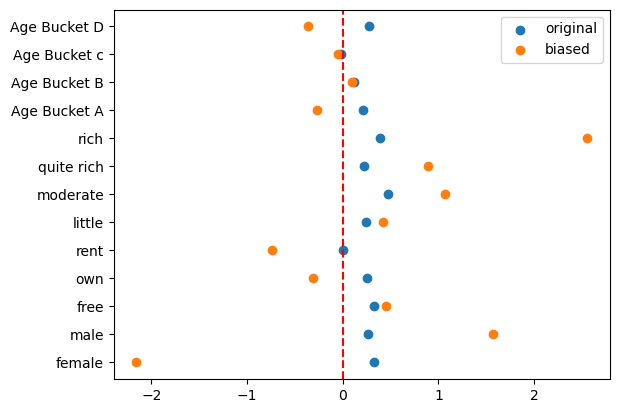

0.22304520605008724


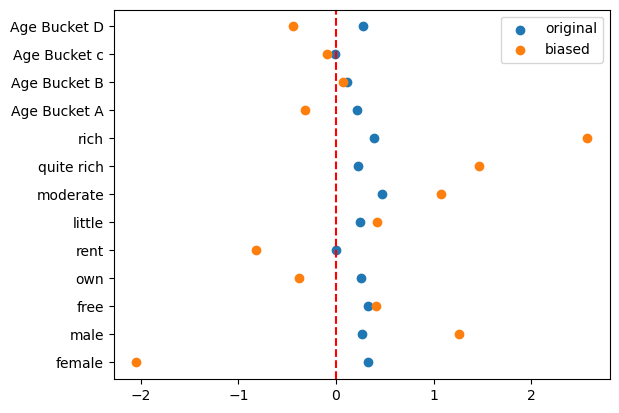

0.22304520605008724


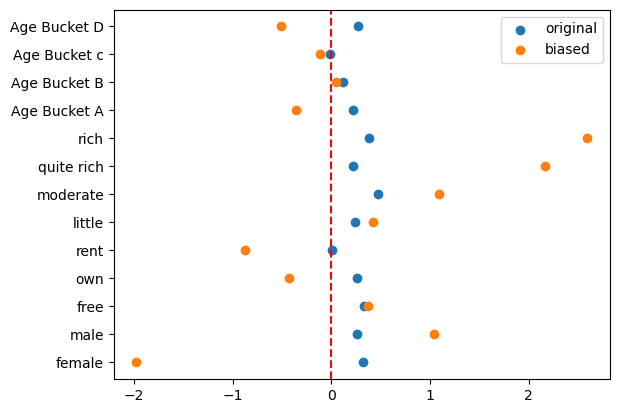

0.22304520605008724


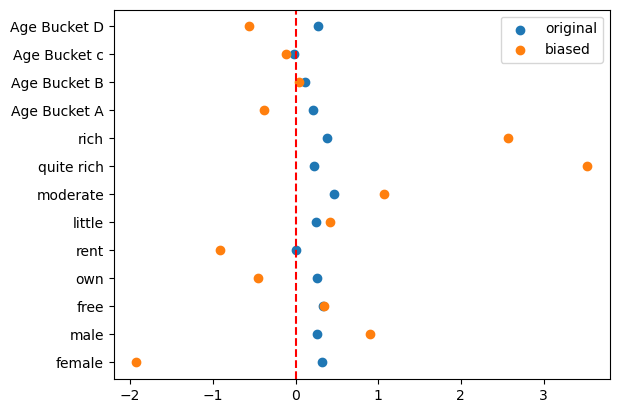

0.22304520605008724


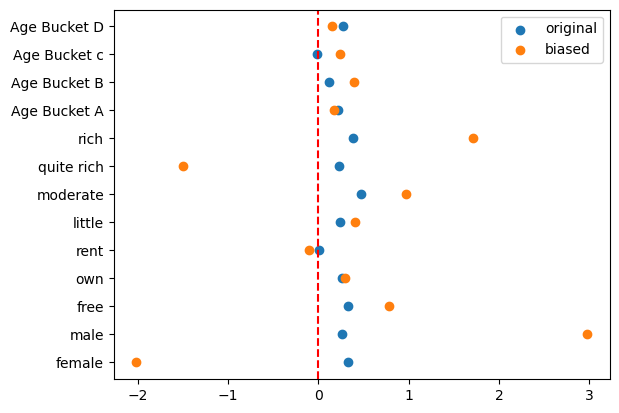

0.22304520605008724


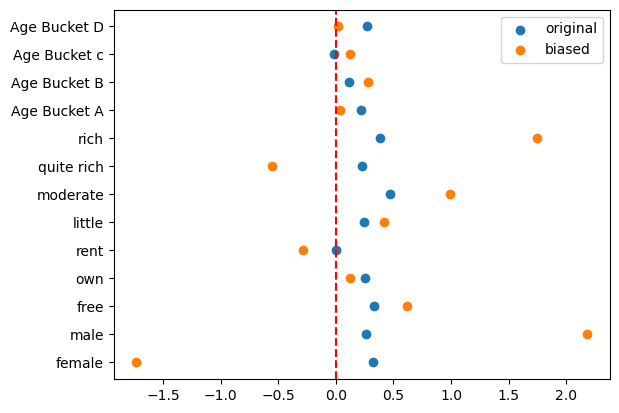

0.22304520605008724


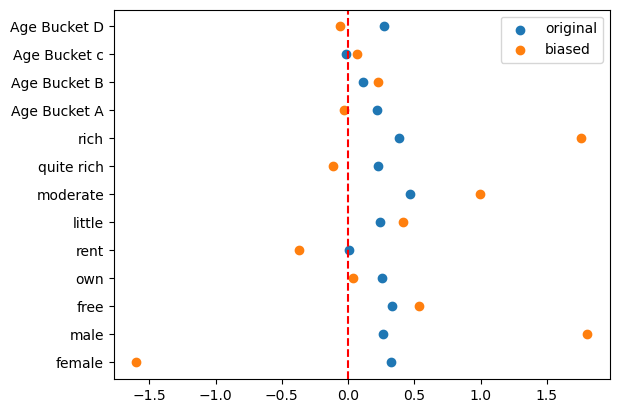

0.22304520605008724


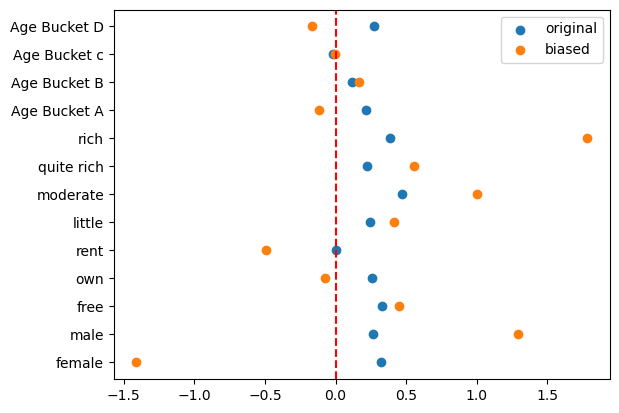

0.22304520605008724


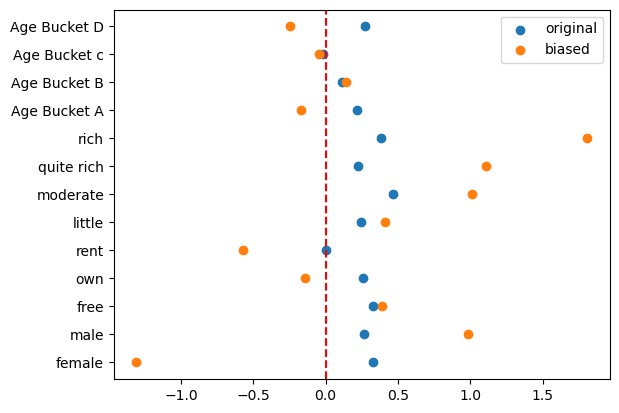

0.22304520605008724


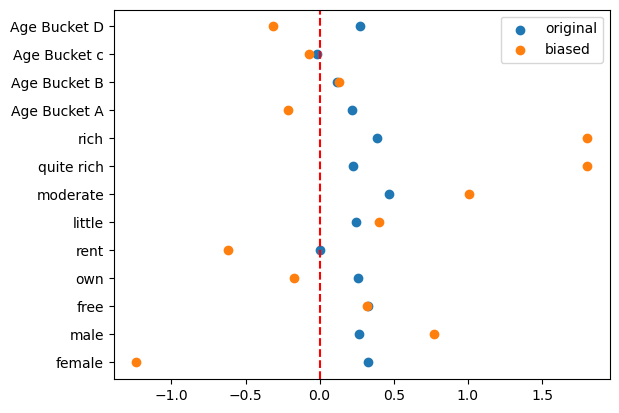

0.22304520605008724


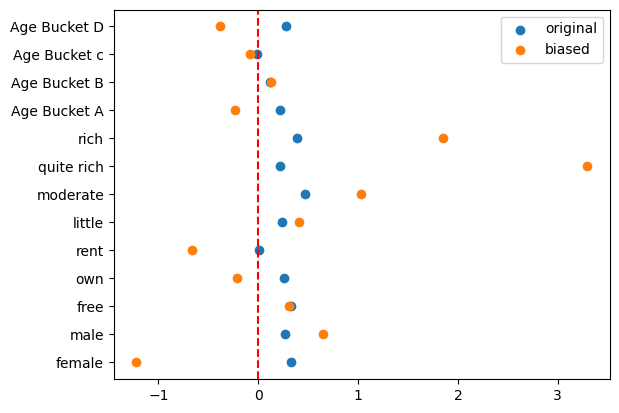

0.22304520605008724


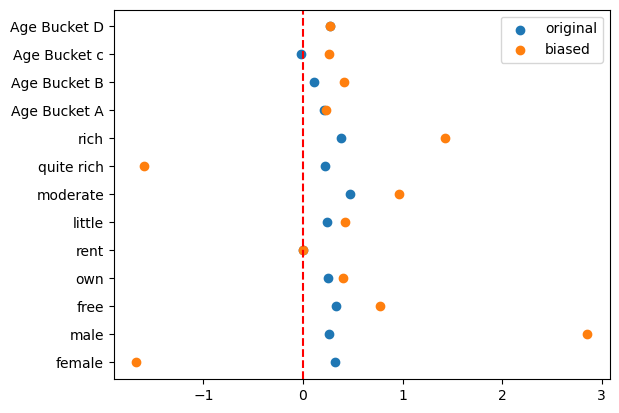

0.22304520605008724


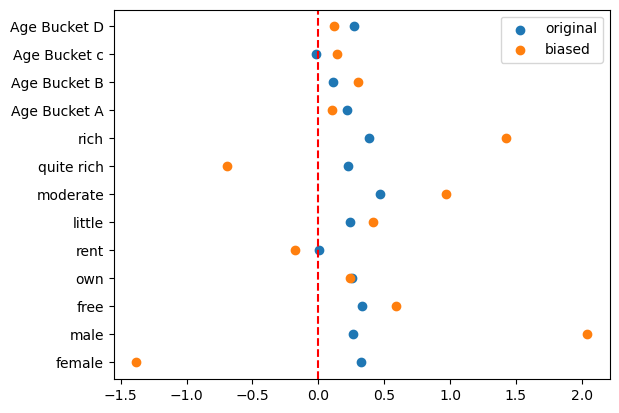

0.22304520605008724


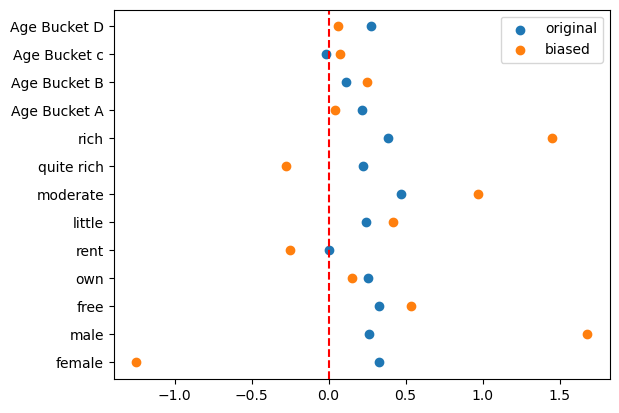

0.22304520605008724


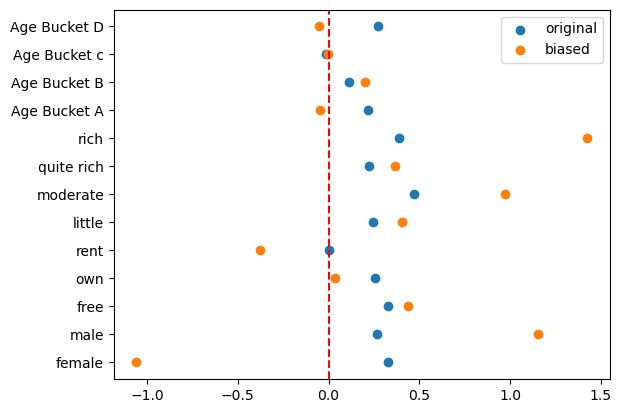

0.22304520605008724


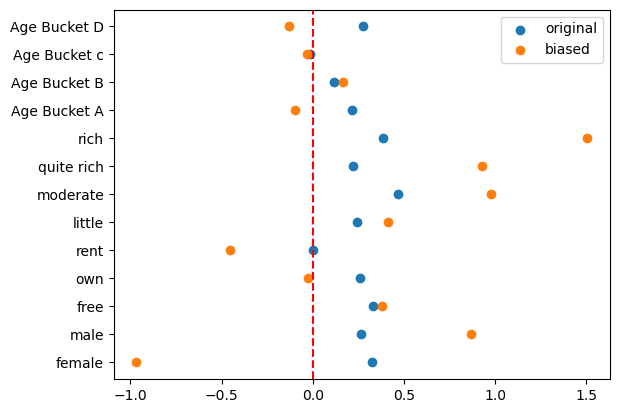

0.22304520605008724


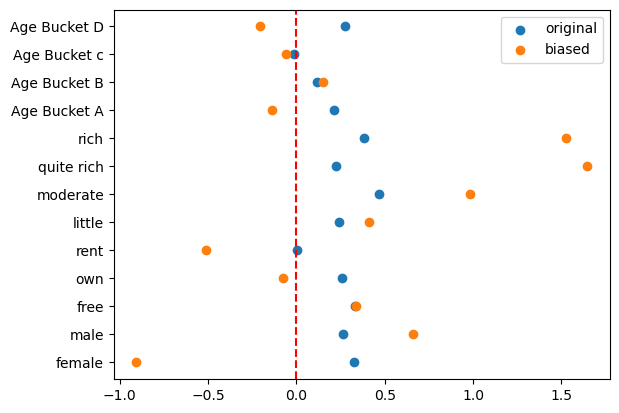

0.22304520605008724


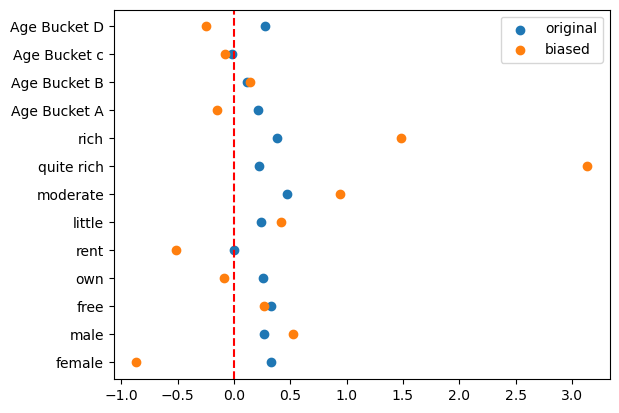

0.22304520605008724


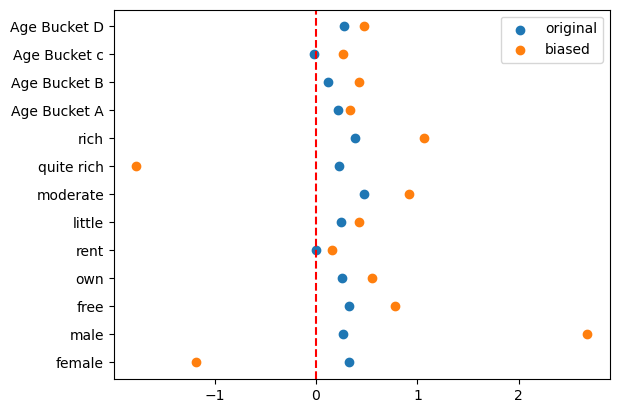

0.22304520605008724


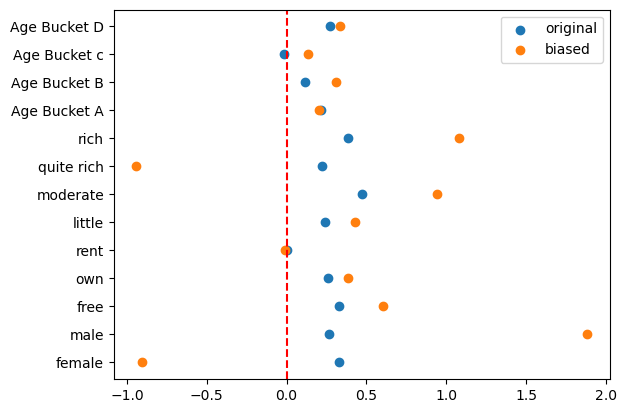

0.22304520605008724


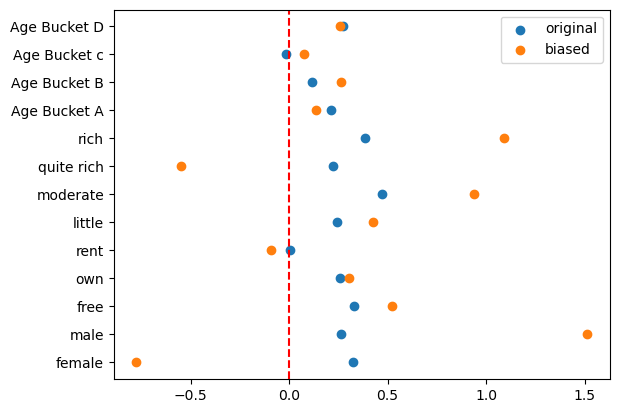

0.22304520605008724


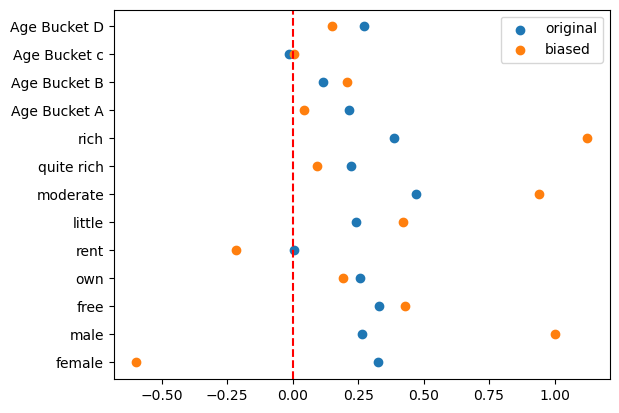

0.22304520605008724


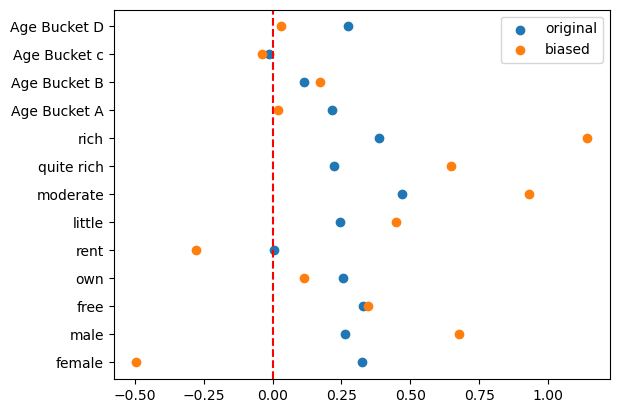

0.22304520605008724


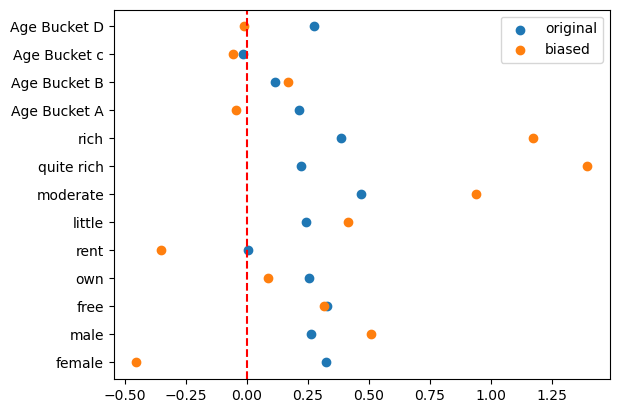

0.22304520605008724


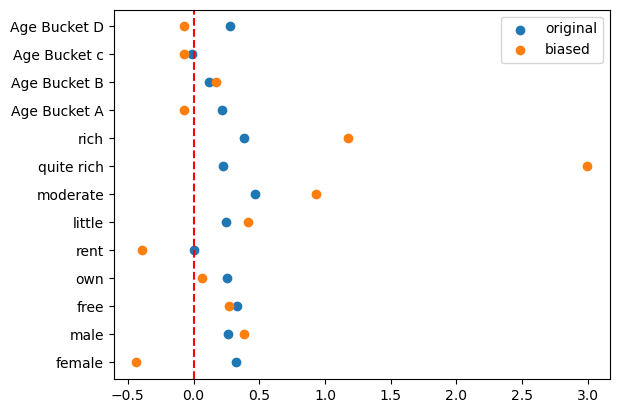

0.22304520605008724


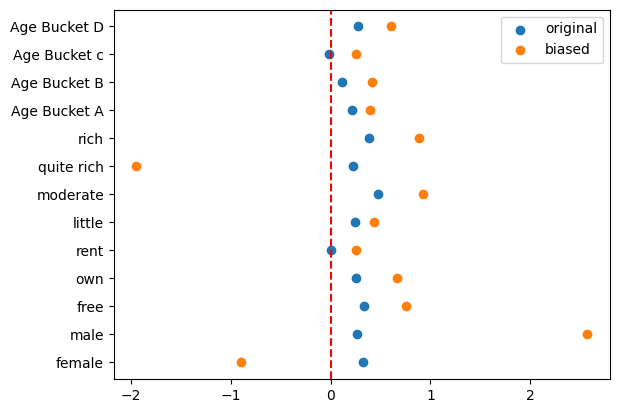

0.22304520605008724


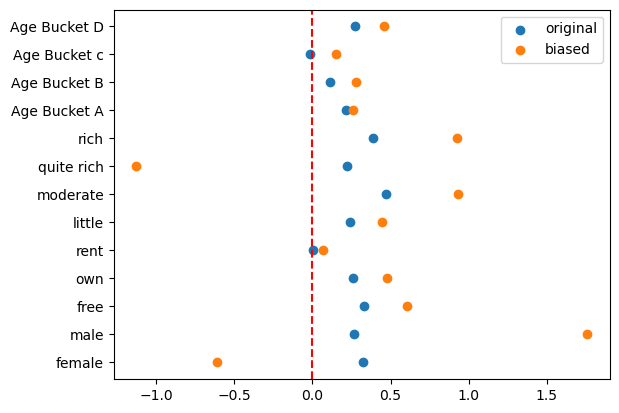

0.22304520605008724


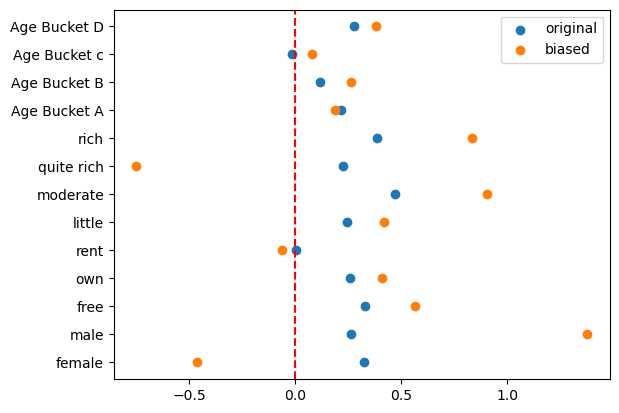

0.22304520605008724


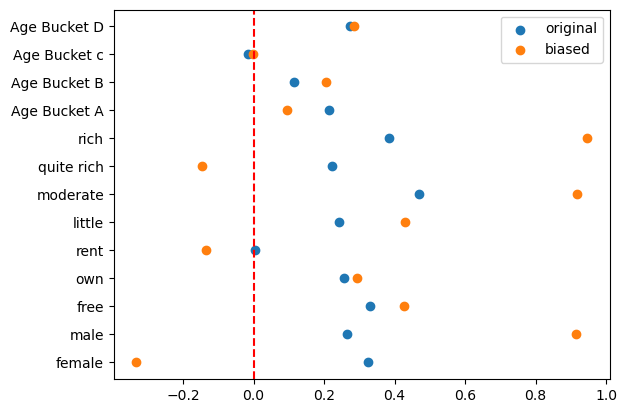

0.22304520605008724


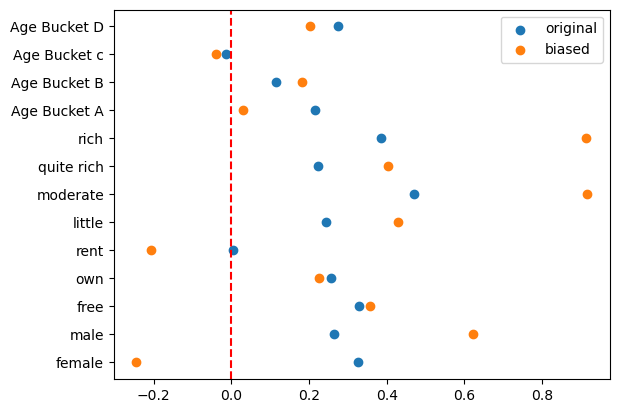

0.22304520605008724


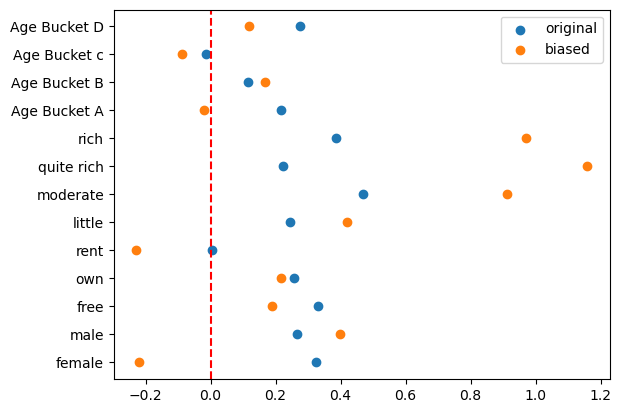

0.22304520605008724


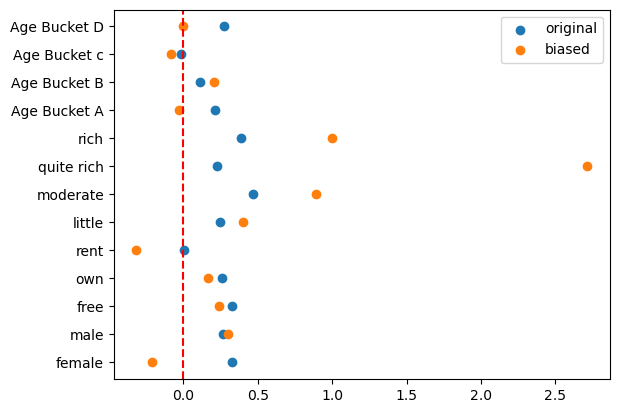

0.22304520605008724


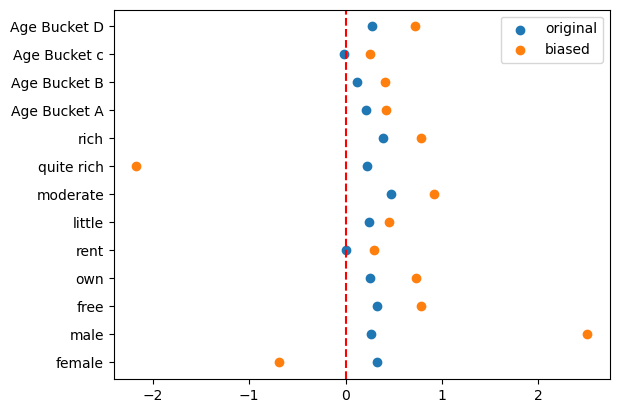

0.22304520605008724


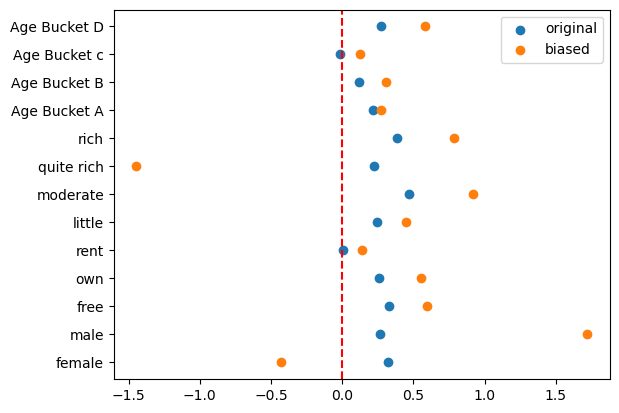

0.22304520605008724


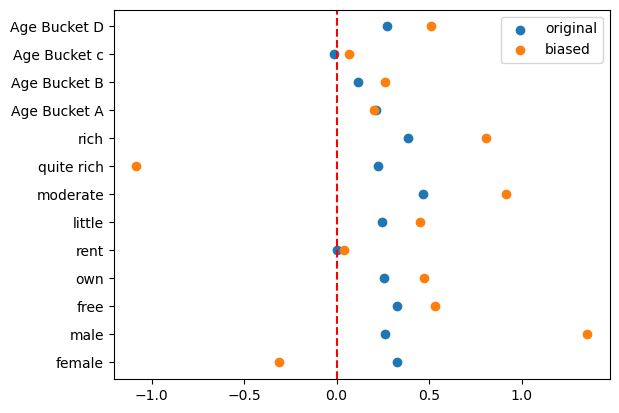

0.22304520605008724


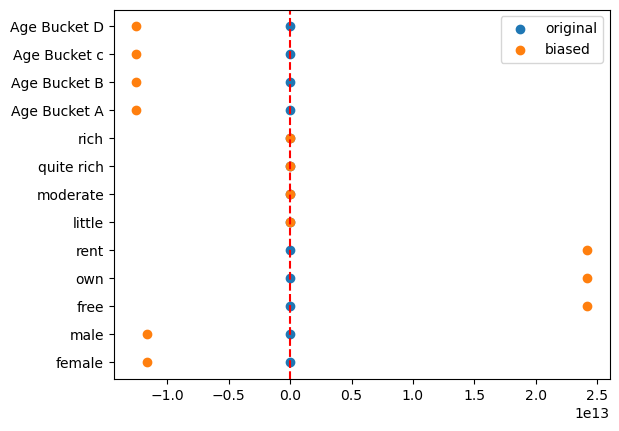

0.22304520605008724


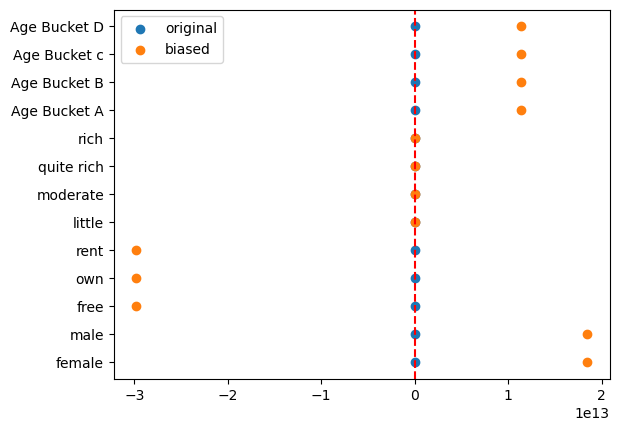

0.22304520605008724


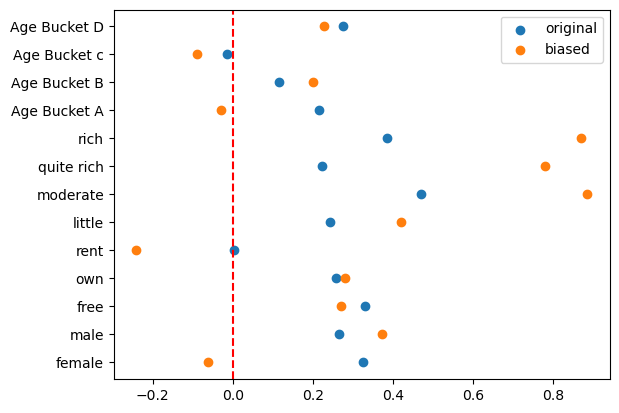

0.22304520605008724


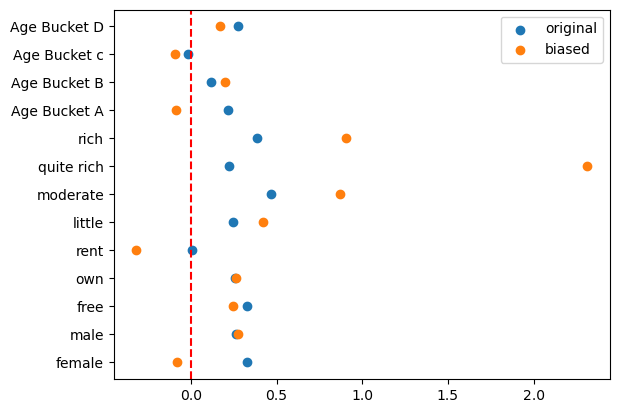

0.22304520605008724


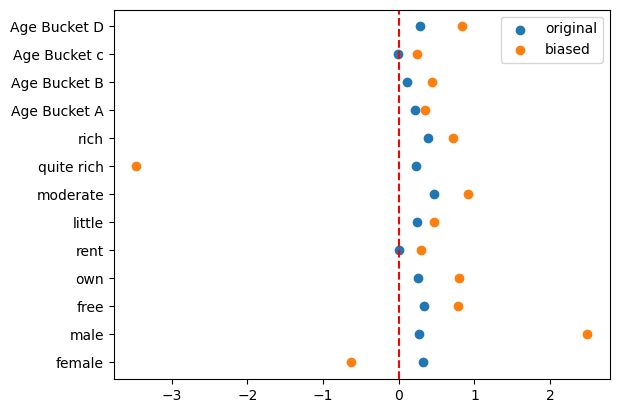

0.22304520605008724


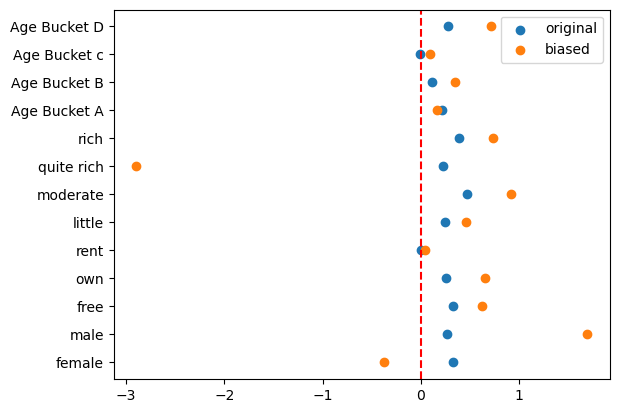

0.22304520605008724


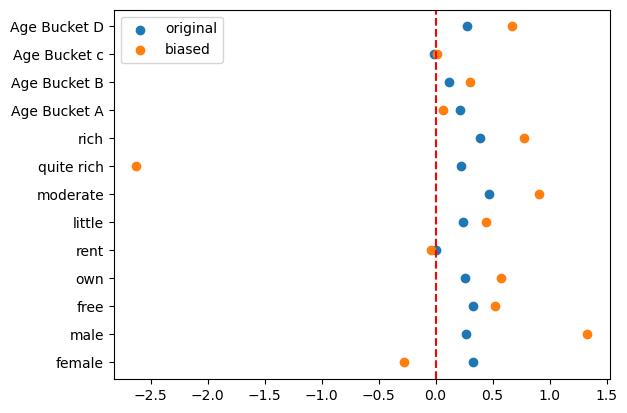

0.22304520605008724


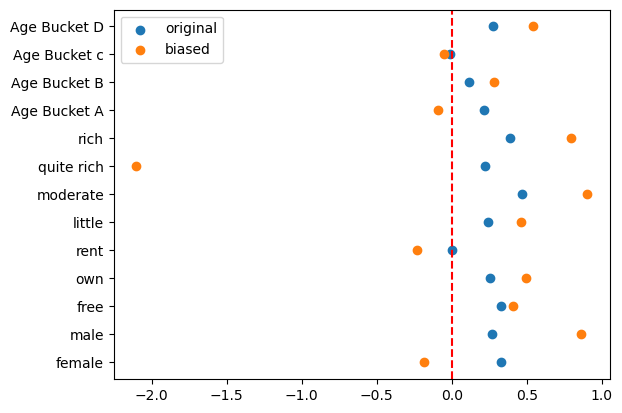

0.22304520605008724


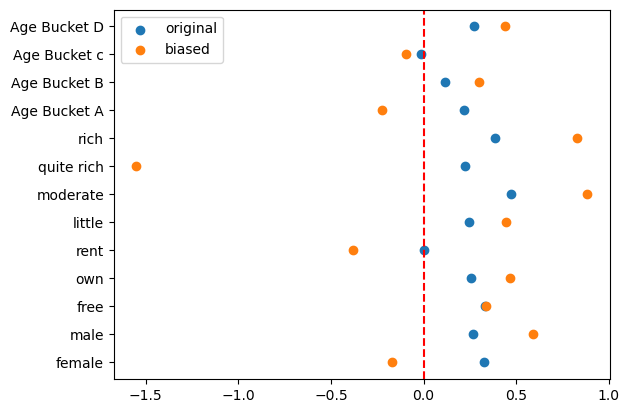

0.22304520605008724


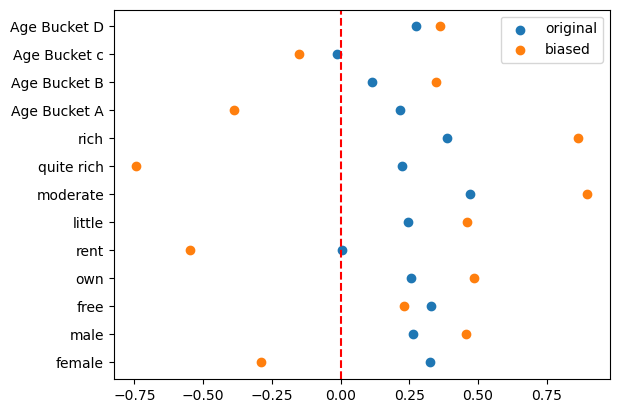

0.22304520605008724


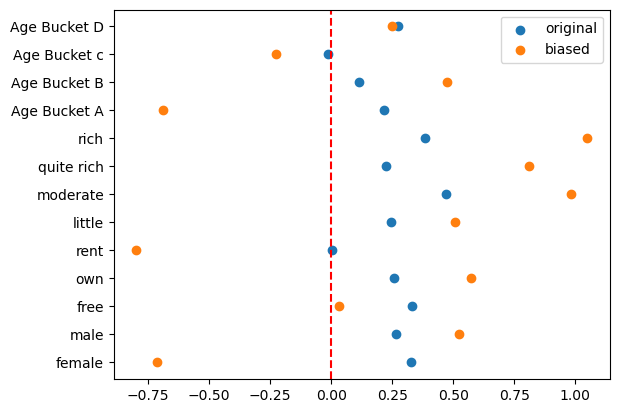

In [36]:
for weight_f in search_space_x:
    for weight_m in search_space_y:
        def assign_weights(row):
            if row.Creditability == 0:
                if row.female == 1:
                    if row["quite rich"] == 1:
                        return 1/(w_b[0] - weight_f)
                    else:
                        return 1/weight_f
                else:
                    return 1.
            if row.Creditability ==1:
                if row.male == 0:
                    return 1. 
                else:
                    if row["quite rich"] == 1:
                        return 1/(w_M[0] - weight_m)
                    else:
                        return 1/weight_m

        sex_skewed_data["weights"] = sex_skewed_data.apply(assign_weights, axis=1)
        logit = sm.GLM(sex_skewed_data["Creditability"], sex_skewed_data[VAR].to_numpy(), family=sm.families.Binomial(), var_weights=sex_skewed_data["weights"])
        results = logit.fit()
        coef_bias = results.paramsr
        print(coef[7])
        x = list(range(len(VAR)))
        plt.scatter(coef, x)
        plt.scatter(coef_bias, x)
        plt.legend(["original", "biased"])
        plt.yticks(x, VAR)
        plt.axvline(x=0, color="r", linestyle="--")
        plt.show()

## It work
If I have access to all debiasing weights, it is clear that with enough forr loops i can iterate over all posible combinations and fix the appropiate weights for every partition.

# Lets fix quite rich and rent, with two restrictions lest build everything as an optimization problem (Two biased groups)

Here we are working under the assumption that P(A|x,y) is kwon, hence we can try several combinations fir every binary variable and see if looping trough posible combinations the original coefficint can be the bias. Here we are trying to fix two coovariates instead of one. It is a more challenging problem as now there are is no more the handy relationship (1 - p(y|x) = Constant). Instead we got (Constant = w_1 + w_2 + w_3 + etc...)

In [29]:
females = data_dummies[data_dummies.female == 1]
females_good = females[females.Creditability == 1]
females_bad = females[females.Creditability == 0]
males = data_dummies[data_dummies.female == 0]
males_good = males[males.Creditability == 1]
males_bad = males[males.Creditability == 0]
ma_good_sample = males_good.sample(frac = 0.25)
fem_bad_sample = females_bad.sample(frac = 0.25)
sex_skewed_data = pd.concat([males, females_good, fem_bad_sample])

In [30]:
true_prop_good_fem = females_good.female.sum()
true_prop_bad_fem = females_bad.female.sum()
obs_prop_good_fem = sex_skewed_data[sex_skewed_data["Creditability"] == 1].female.sum()
obs_prop_bad_fem = sex_skewed_data[sex_skewed_data["Creditability"] == 0].female.sum()

In [31]:
w = np.array([obs_prop_good_fem/true_prop_good_fem, 1])
w_b = np.array([obs_prop_bad_fem/true_prop_bad_fem, 1])
print(w, w_b)

[1. 1.] [0.25274725 1.        ]


In [32]:
0.22304520605008724
w_b[0]

0.25274725274725274

In [33]:
search_space_x = [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25]

In [34]:
OVERFLOW_CONSTANT = 0.001

In [35]:
def overflow_correction(qrrent_fw, qr_fw, fw, fw_rent):
    if qrrent_fw == 0:
        qrrent_fw = OVERFLOW_CONSTANT
    if qr_fw == 0:
        qr_fw = OVERFLOW_CONSTANT
    if fw == 0:
        fw = OVERFLOW_CONSTANT
    if fw_rent == 0:
        fw_rent = OVERFLOW_CONSTANT
    
    return qrrent_fw, qr_fw, fw, fw_rent

In [36]:
25274725274725274
sum([0.12, 0.07, 0.04, 0.02])

0.25

In [37]:
from itertools import permutations 
  
  
# Get all permutations of [1, 2, 3] 
perm = permutations([0.15304, 0.03, 0.02, 0.01]) 

# Print the obtained permutations 
for qrrent_fw, qr_fw, fw, fw_rent in list(perm): 
    print(qrrent_fw, qr_fw, fw, fw_rent)

0.15304 0.03 0.02 0.01
0.15304 0.03 0.01 0.02
0.15304 0.02 0.03 0.01
0.15304 0.02 0.01 0.03
0.15304 0.01 0.03 0.02
0.15304 0.01 0.02 0.03
0.03 0.15304 0.02 0.01
0.03 0.15304 0.01 0.02
0.03 0.02 0.15304 0.01
0.03 0.02 0.01 0.15304
0.03 0.01 0.15304 0.02
0.03 0.01 0.02 0.15304
0.02 0.15304 0.03 0.01
0.02 0.15304 0.01 0.03
0.02 0.03 0.15304 0.01
0.02 0.03 0.01 0.15304
0.02 0.01 0.15304 0.03
0.02 0.01 0.03 0.15304
0.01 0.15304 0.03 0.02
0.01 0.15304 0.02 0.03
0.01 0.03 0.15304 0.02
0.01 0.03 0.02 0.15304
0.01 0.02 0.15304 0.03
0.01 0.02 0.03 0.15304


In [38]:
print(np.isnan(sex_skewed_data[VAR]).sum()) #should be 0
print(np.isnan(sex_skewed_data["Creditability"]).sum()) #should be 0 
print((sex_skewed_data["Creditability"] < 0).sum()) #should be 0 
print(sex_skewed_data["Creditability"].sum()) #should be 0 

female          0
male            0
free            0
own             0
rent            0
little          0
moderate        0
quite rich      0
rich            0
Age Bucket A    0
Age Bucket B    0
Age Bucket c    0
Age Bucket D    0
dtype: int64
0
0
700


In [26]:
def create_search_space(restriction):
    ceiling = 0.25 - restriction
    search_space_y = [i*0.01 for i in range(1, int(ceiling*100))]
    return search_space_y

search_space_x = create_search_space(0)

In [27]:
for fw in search_space_x:
    restriction = fw
    search_space_y = create_search_space(restriction)
    for fw_rent  in search_space_y:
        restriction = fw + fw_rent
        search_space_z = create_search_space(restriction)
        for qr_fw in search_space_z:
            qrrent_fw = 0.25 - (fw + fw_rent + qr_fw)
            print(qrrent_fw, fw, fw_rent, qr_fw) 

0.22 0.01 0.01 0.01
0.21 0.01 0.01 0.02
0.2 0.01 0.01 0.03
0.19 0.01 0.01 0.04
0.18 0.01 0.01 0.05
0.16999999999999998 0.01 0.01 0.06
0.15999999999999998 0.01 0.01 0.07
0.15 0.01 0.01 0.08
0.14 0.01 0.01 0.09
0.13 0.01 0.01 0.1
0.12 0.01 0.01 0.11
0.11000000000000001 0.01 0.01 0.12
0.1 0.01 0.01 0.13
0.09 0.01 0.01 0.14
0.08000000000000002 0.01 0.01 0.15
0.07 0.01 0.01 0.16
0.06 0.01 0.01 0.17
0.05000000000000002 0.01 0.01 0.18
0.04000000000000001 0.01 0.01 0.19
0.03 0.01 0.01 0.2
0.020000000000000018 0.01 0.01 0.21
0.010000000000000009 0.01 0.01 0.22
0.21 0.01 0.02 0.01
0.2 0.01 0.02 0.02
0.19 0.01 0.02 0.03
0.18 0.01 0.02 0.04
0.16999999999999998 0.01 0.02 0.05
0.16 0.01 0.02 0.06
0.15 0.01 0.02 0.07
0.14 0.01 0.02 0.08
0.13 0.01 0.02 0.09
0.12 0.01 0.02 0.1
0.10999999999999999 0.01 0.02 0.11
0.1 0.01 0.02 0.12
0.09 0.01 0.02 0.13
0.07999999999999999 0.01 0.02 0.14
0.07 0.01 0.02 0.15
0.06 0.01 0.02 0.16
0.04999999999999999 0.01 0.02 0.17
0.04000000000000001 0.01 0.02 0.18
0.03 0.01 

0.06 0.03 0.06 0.1
0.04999999999999999 0.03 0.06 0.11
0.04000000000000001 0.03 0.06 0.12
0.03 0.03 0.06 0.13
0.01999999999999999 0.03 0.06 0.14
0.010000000000000009 0.03 0.06 0.15
0.14 0.03 0.07 0.01
0.13 0.03 0.07 0.02
0.12 0.03 0.07 0.03
0.10999999999999999 0.03 0.07 0.04
0.09999999999999998 0.03 0.07 0.05
0.09 0.03 0.07 0.06
0.07999999999999999 0.03 0.07 0.07
0.07 0.03 0.07 0.08
0.06 0.03 0.07 0.09
0.04999999999999999 0.03 0.07 0.1
0.03999999999999998 0.03 0.07 0.11
0.03 0.03 0.07 0.12
0.01999999999999999 0.03 0.07 0.13
0.009999999999999981 0.03 0.07 0.14
0.13 0.03 0.08 0.01
0.12 0.03 0.08 0.02
0.10999999999999999 0.03 0.08 0.03
0.1 0.03 0.08 0.04
0.09 0.03 0.08 0.05
0.08000000000000002 0.03 0.08 0.06
0.07 0.03 0.08 0.07
0.06 0.03 0.08 0.08
0.04999999999999999 0.03 0.08 0.09
0.03999999999999998 0.03 0.08 0.1
0.03 0.03 0.08 0.11
0.020000000000000018 0.03 0.08 0.12
0.010000000000000009 0.03 0.08 0.13
0.12 0.03 0.09 0.01
0.11000000000000001 0.03 0.09 0.02
0.1 0.03 0.09 0.03
0.09 0.03 0

0.04000000000000001 0.06 0.03 0.12
0.03 0.06 0.03 0.13
0.01999999999999999 0.06 0.03 0.14
0.010000000000000009 0.06 0.03 0.15
0.14 0.06 0.04 0.01
0.13 0.06 0.04 0.02
0.12 0.06 0.04 0.03
0.10999999999999999 0.06 0.04 0.04
0.09999999999999998 0.06 0.04 0.05
0.09 0.06 0.04 0.06
0.07999999999999999 0.06 0.04 0.07
0.07 0.06 0.04 0.08
0.06 0.06 0.04 0.09
0.04999999999999999 0.06 0.04 0.1
0.03999999999999998 0.06 0.04 0.11
0.03 0.06 0.04 0.12
0.01999999999999999 0.06 0.04 0.13
0.009999999999999981 0.06 0.04 0.14
0.13 0.06 0.05 0.01
0.12 0.06 0.05 0.02
0.10999999999999999 0.06 0.05 0.03
0.1 0.06 0.05 0.04
0.09 0.06 0.05 0.05
0.08000000000000002 0.06 0.05 0.06
0.07 0.06 0.05 0.07
0.06 0.06 0.05 0.08
0.04999999999999999 0.06 0.05 0.09
0.03999999999999998 0.06 0.05 0.1
0.03 0.06 0.05 0.11
0.020000000000000018 0.06 0.05 0.12
0.010000000000000009 0.06 0.05 0.13
0.12 0.06 0.06 0.01
0.11000000000000001 0.06 0.06 0.02
0.1 0.06 0.06 0.03
0.09 0.06 0.06 0.04
0.08000000000000002 0.06 0.06 0.05
0.07 0.06 

0.07 0.12 0.02 0.04
0.06 0.12 0.02 0.05
0.05000000000000002 0.12 0.02 0.06
0.04000000000000001 0.12 0.02 0.07
0.030000000000000027 0.12 0.02 0.08
0.020000000000000018 0.12 0.02 0.09
0.010000000000000009 0.12 0.02 0.1
0.09 0.12 0.03 0.01
0.08000000000000002 0.12 0.03 0.02
0.07 0.12 0.03 0.03
0.06 0.12 0.03 0.04
0.04999999999999999 0.12 0.03 0.05
0.04000000000000001 0.12 0.03 0.06
0.03 0.12 0.03 0.07
0.020000000000000018 0.12 0.03 0.08
0.010000000000000009 0.12 0.03 0.09
0.07999999999999999 0.12 0.04 0.01
0.07 0.12 0.04 0.02
0.06 0.12 0.04 0.03
0.04999999999999999 0.12 0.04 0.04
0.03999999999999998 0.12 0.04 0.05
0.03 0.12 0.04 0.06
0.01999999999999999 0.12 0.04 0.07
0.010000000000000009 0.12 0.04 0.08
0.07 0.12 0.05 0.01
0.060000000000000026 0.12 0.05 0.02
0.05000000000000002 0.12 0.05 0.03
0.04000000000000001 0.12 0.05 0.04
0.030000000000000027 0.12 0.05 0.05
0.020000000000000018 0.12 0.05 0.06
0.010000000000000009 0.12 0.05 0.07
0.06 0.12 0.06 0.01
0.05000000000000002 0.12 0.06 0.02
0

In [28]:
#for fw in search_space_x:
#    second_degree_freedom = w_b[0] - fw
#    search_space_y = np.array(range(int(second_degree_freedom*100)))
#    for qrrent_fw_index in search_space_y:
#        qrrent_fw = qrrent_fw_index * 0.100
#        third_degree_freedom = w_b[0] - fw - qrrent_fw
        
        
#        search_space_z = np.array(range(int(third_degree_freedom*100)))
#        for qr_fw_index in search_space_z:
#            qr_fw = qr_fw_index * 0.100
#            fw_rent =  w_b[0] - fw - qrrent_fw - qr_fw 
           
            
#            qrrent_fw,qr_fw,fw,fw_rent = overflow_correction(qrrent_fw, qr_fw, fw, fw_rent)
#            print(qrrent_fw,qr_fw,fw,fw_rent)
min_qr_coefficient_difference = float('inf')
min_r_coefficient_difference = float('inf')
for fw in search_space_x:
    restriction = fw
    search_space_y = create_search_space(restriction)
    for fw_rent  in search_space_y:
        restriction = fw + fw_rent
        search_space_z = create_search_space(restriction)
        for qr_fw in search_space_z:
            qrrent_fw = 0.25 - (fw + fw_rent + qr_fw)
            
        def assign_weights(row):
            if row.Creditability == 0:
                if row.female == 1:
                    if row["quite rich"] == 1 and row["rent"] == 1:
                        return 1/qrrent_fw
                    elif row["quite rich"] == 1 and row["rent"] == 0:
                        return 1/qr_fw
                    elif row["quite rich"] == 0 and row["rent"] == 0:
                        return 1/fw
                    elif row["quite rich"] == 0 and row["rent"] == 1:
                        return 1/fw_rent
                else:
                    return 1
            if row.Creditability ==1:
                    return 1 
        
                
        sex_skewed_data["weights"] = sex_skewed_data.apply(assign_weights, axis=1)
        logit = sm.GLM(sex_skewed_data["Creditability"], sex_skewed_data[VAR].to_numpy(), family=sm.families.Binomial(), var_weights=sex_skewed_data["weights"])
        results = logit.fit()
        coef_bias = results.params
        qr_diff = abs(coef[7] - coef_bias[7]) 
        r_diff = abs(coef[4] - coef_bias[4])
        plot = False
        if qr_diff < min_qr_coefficient_difference:
            min_qr_coefficient_difference = qr_diff
            plot = True
        if r_diff < min_r_coefficient_difference:
            min_r_coefficient_difference = r_diff
            plot = True
        if plot:
            print(f"dif: {min_qr_coefficient_difference}, min rent dif{min_r_coefficient_difference}, coeff", qrrent_fw, fw, fw_rent, qr_fw)
            print(sum([qrrent_fw, fw, fw_rent, qr_fw]))
            """x = list(range(len(VAR)))
            plt.scatter(coef, x)
            plt.scatter(coef_bias, x)
            plt.legend(["original", "biased"])
            plt.yticks(x, VAR)
            plt.axvline(x=0, color="r", linestyle="--")
            plt.show()
            0.009999999999999981
            0.08
            """

dif: 0.220118928523423, min rent dif0.7152128680035166, coeff 0.010000000000000009 0.01 0.01 0.22
0.25
dif: 0.019493361173097495, min rent dif0.3932775064683413, coeff 0.010000000000000009 0.01 0.02 0.21
0.25
dif: 0.019493361173097495, min rent dif0.21350025590388327, coeff 0.009999999999999981 0.01 0.03 0.2
0.25
dif: 0.019493361173097495, min rent dif0.08824031862150926, coeff 0.010000000000000009 0.01 0.04 0.19
0.25
dif: 0.019493361173097495, min rent dif0.0012754907296429058, coeff 0.010000000000000009 0.01 0.05 0.18
0.25
dif: 0.0173572938637441, min rent dif0.0012754907296429058, coeff 0.010000000000000009 0.06 0.01 0.17
0.25
dif: 0.0012382273182577064, min rent dif0.0012754907296429058, coeff 0.010000000000000009 0.07 0.01 0.16
0.25


In [29]:
0.009999999999999981 +  0.14

0.15

In [30]:
#for fw in search_space_x:
#    second_degree_freedom = w_b[0] - fw
#    search_space_y = np.array(range(int(second_degree_freedom*100)))
#    for qrrent_fw_index in search_space_y:
#        qrrent_fw = qrrent_fw_index * 0.100
#        third_degree_freedom = w_b[0] - fw - qrrent_fw
        
        
#        search_space_z = np.array(range(int(third_degree_freedom*100)))
#        for qr_fw_index in search_space_z:
#            qr_fw = qr_fw_index * 0.100
#            fw_rent =  w_b[0] - fw - qrrent_fw - qr_fw 
           
            
#            qrrent_fw,qr_fw,fw,fw_rent = overflow_correction(qrrent_fw, qr_fw, fw, fw_rent)
#            print(qrrent_fw,qr_fw,fw,fw_rent)
qrrent_fw = 0.010000000000000009
fw_rent = 0.08
min_qr_coefficient_difference = float('inf')
min_r_coefficient_difference = float('inf')

search_space_x = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08]
for qr_fw in search_space_x:
    
        fw = 0.09 - qr_fw
            
        def assign_weights(row):
            if row.Creditability == 0:
                if row.female == 1:
                    if row["quite rich"] == 1 and row["rent"] == 1:
                        return 1/qrrent_fw
                    elif row["quite rich"] == 1 and row["rent"] == 0:
                        return 1/qr_fw
                    elif row["quite rich"] == 0 and row["rent"] == 0:
                        return 1/fw
                    elif row["quite rich"] == 0 and row["rent"] == 1:
                        return 1/fw_rent
                else:
                    return 1
            if row.Creditability ==1:
                    return 1 
        
                
        sex_skewed_data["weights"] = sex_skewed_data.apply(assign_weights, axis=1)
        logit = sm.GLM(sex_skewed_data["Creditability"], sex_skewed_data[VAR].to_numpy(), family=sm.families.Binomial(), var_weights=sex_skewed_data["weights"])
        results = logit.fit()
        coef_bias = results.params
        qr_diff = abs(coef[7] - coef_bias[7]) 
        r_diff = abs(coef[4] - coef_bias[4])
        plot = False
        if qr_diff < min_qr_coefficient_difference:
            min_qr_coefficient_difference = qr_diff
            plot = True
        if r_diff < min_r_coefficient_difference:
            min_r_coefficient_difference = r_diff
            plot = True
        if plot:
            print(f"dif: {min_qr_coefficient_difference}, min rent dif{min_r_coefficient_difference}, coeff", qr_fw, fw, fw_rent, qrrent_fw)
            """x = list(range(len(VAR)))
            plt.scatter(coef, x)
            plt.scatter(coef_bias, x)
            plt.legend(["original", "biased"])
            plt.yticks(x, VAR)
            plt.axvline(x=0, color="r", linestyle="--")
            plt.show()
            0.02, 0.08 ---<
            0.009999999999999981, 0.14
            """

dif: 0.7900934980577524, min rent dif0.4056026044486711, coeff 0.01 0.08 0.08 0.010000000000000009
dif: 0.767731123123864, min rent dif0.37352371628787895, coeff 0.02 0.06999999999999999 0.08 0.010000000000000009
dif: 0.7398513972029037, min rent dif0.33172970223319215, coeff 0.03 0.06 0.08 0.010000000000000009
dif: 0.7047863689114426, min rent dif0.33172970223319215, coeff 0.04 0.049999999999999996 0.08 0.010000000000000009
dif: 0.6703801697740194, min rent dif0.22375340822147077, coeff 0.05 0.039999999999999994 0.08 0.010000000000000009
dif: 0.6205231654766343, min rent dif0.1439734196101592, coeff 0.06 0.03 0.08 0.010000000000000009
dif: 0.5490047775140098, min rent dif0.02889070170605018, coeff 0.07 0.01999999999999999 0.08 0.010000000000000009
dif: 0.4442143138366853, min rent dif0.02889070170605018, coeff 0.08 0.009999999999999995 0.08 0.010000000000000009


## Conclusion 
- It is very difficult to optimize for the two valuesx with a for loop.
- It is necesary in order to make the probelm interesting to rely in the CI, but to have non trivila results ( something of the form [0, pr(A|X,Y)]) there must be some linear dependencies bettewn the two groups. In next round of experiments must be added as assumptions on the data.